# Advanced Visualization 1

## Exploring Datasets with Pandas and Matplotlib

Datasets:

Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

### Downloading and Prepping Data

In [1]:
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df_can.shape)

(195, 51)


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df_can.head(3)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# rename the columns
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df_can.columns)

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')


In [8]:
df_can.drop(['Unnamed: 48','Unnamed: 49','Unnamed: 50'], axis = 1, inplace = True)
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,716,561,539,620,603,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,5393,4752,4325,3774,4331,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df_can.columns)

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'],
      dtype='object')


In [10]:
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'],
      dtype='object')


### Example map

map(function, iterables)

* **function** : 	Required. The function to execute for each item

* **iterable** :	Required. A sequence, collection or an iterator object. You can send as many iterables as you like, just make sure the function has one parameter for each iterable.

In [11]:
def myfunc(n):
  return len(n)

x = map(myfunc, ('apple', 'banana', 'cherry'))
print(list(x))

[5, 6, 6]


In [12]:
def myfunc(a, b):
  return a + b

x = map(myfunc, ('apple', 'banana', 'cherry'), ('orange', 'lemon', 'pineapple'))
print(list(x))

['appleorange', 'bananalemon', 'cherrypineapple']


In [13]:
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'],
      dtype='object')


In [14]:
print(df_can.index)

RangeIndex(start=0, stop=195, step=1)


In [15]:
# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)
print(df_can.index)

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)


In [16]:
print(df_can.head(1))

            Continent         Region             DevName  1980  1981  1982  \
Country                                                                      
Afghanistan      Asia  Southern Asia  Developing regions    16    39    39   

             1983  1984  1985  1986  ...  2009  2010  2011  2012  2013  \
Country                              ...                                 
Afghanistan    47    71   340   496  ...  1746  1758  2203  2635  2004   

             Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  
Country                                                                       
Afghanistan          NaN          NaN          NaN          NaN          NaN  

[1 rows x 42 columns]


In [17]:
# add total column
df_can['Total'] =  df_can.sum(axis = 1)
df_can.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,58639.0


In [18]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print(years) 
print ('data dimensions:', df_can.shape)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
data dimensions: (195, 43)


## Waffle Charts

------

Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle Chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Excel.

In [19]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,92,93,94,81,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,46,49,53,59,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,159,134,140,140,NaN,NaN,NaN,NaN,NaN,5866.0


### Step 1. Langkah pertama untuk membuat waffle adalah menentukan proporsi setiap kategori sehubungan dengan totalnya.

In [20]:
total_values = sum(df_dsn['Total'])
total_values

12094.0

In [21]:
# compute the proportion of each category with respect to the total
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]
print(category_proportions)
print(type(category_proportions))

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
<class 'list'>


In [22]:
# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


--------

### enumerate(iterable, start)

* **iterable** :	An iterable object
* **start** :	A Number. Defining the start number of the enumerate object. Default 0

In [23]:
x = ('apple', 'banana', 'cherry')
y = enumerate(x)
print(list(y))

[(0, 'apple'), (1, 'banana'), (2, 'cherry')]


In [24]:
lstA = [0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
for idx, value in enumerate(lstA):
    print ('index :'+ str(idx) + ', ' + str(value))

index :0, 0.32255663965602777
index :1, 0.1924094592359848
index :2, 0.48503390110798744


------

### Step 2. Langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart.

In [25]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


### Step 3. Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [26]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
tiles_per_category

[129, 77, 194]

In [27]:
# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan Swedia akan menempati 194 ubin.

### Step 4. Langkah keempat adalah membuat matriks yang menyerupai wafel dan mengisinya.

In [28]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [29]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan untuk setiap kategori

### Step 5. Petakan matriks waffle chart menjadi visual.

<Figure size 432x288 with 0 Axes>

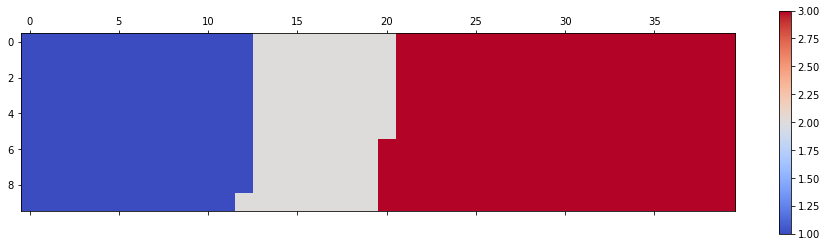

In [30]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

### Step 6. Percantik chart

([], [])

<Figure size 432x288 with 0 Axes>

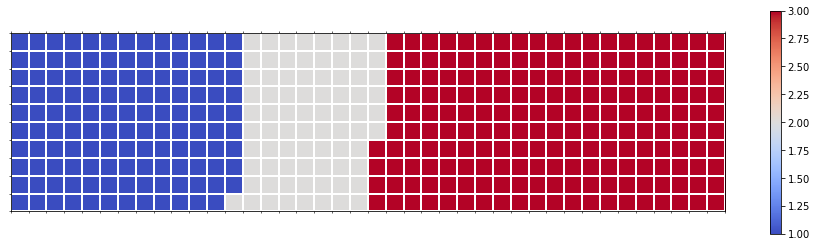

In [31]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

### Step 7. Tambahkan legend

<Figure size 432x288 with 0 Axes>

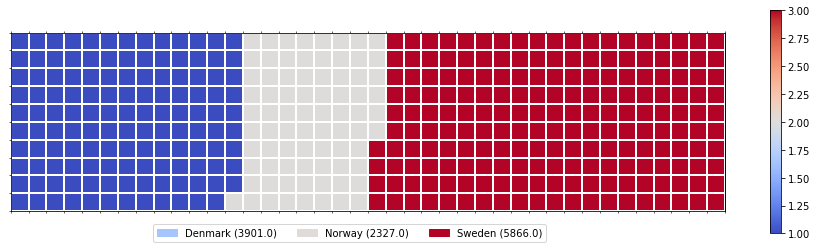

In [32]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Sekarang akan sangat tidak efisien untuk mengulangi ketujuh langkah ini setiap kali kita ingin membuat waffle. Jadi mari kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut **create_waffle_chart**. Fungsi ini akan mengambil parameter berikut sebagai masukan:

1. **categories**: Unique categories or classes in dataframe.
2. **values**: Values corresponding to categories or classes.
3. **height**: Defined height of waffle chart.
4. **width**: Defined width of waffle chart.
5. **colormap**: Colormap class
6. **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

In [33]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Sekarang untuk membuat `waffle`, yang harus kita lakukan adalah memanggil fungsi `create_waffle_chart`. Mari tentukan parameter input:

In [34]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Dan sekarang mari kita panggil fungsi kita untuk membuat `waffle`.

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

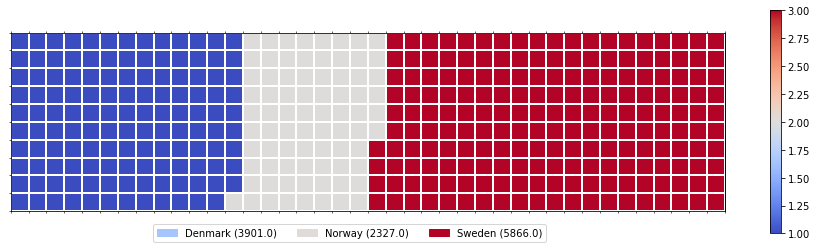

In [35]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds
------

Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

Mari gunakan package `word_cloud` untuk mempelajari cara menghasilkan word cloud untuk dokumen teks tertentu.

In [36]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Word clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Secara bersamaan, mari kita keluar dari kumpulan data imigrasi dan bekerja dengan contoh yang melibatkan analisis data teks. 

Mari kita coba menganalisis novel pendek karangan Lewis Carroll berjudul Alice's Adventures in Wonderland. unduh [file .txt](https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt) dari novel.

In [37]:
# download file and save as alice_novel.txt
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [38]:
alice_novel

'ï»¿Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what

Selanjutnya, mari gunakan stopwords yang kita impor dari word_cloud. Kita menggunakan set untuk menghapus stopword yang berlebihan.

In [39]:
stopwords = set(STOPWORDS)

Buat word cloud object dan generate word cloud. Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel.

In [40]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

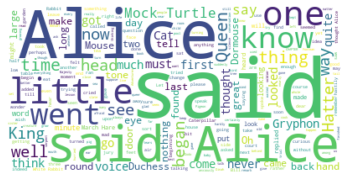

In [41]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah Alice, said, little, went dan seterusnya. Mari ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik.

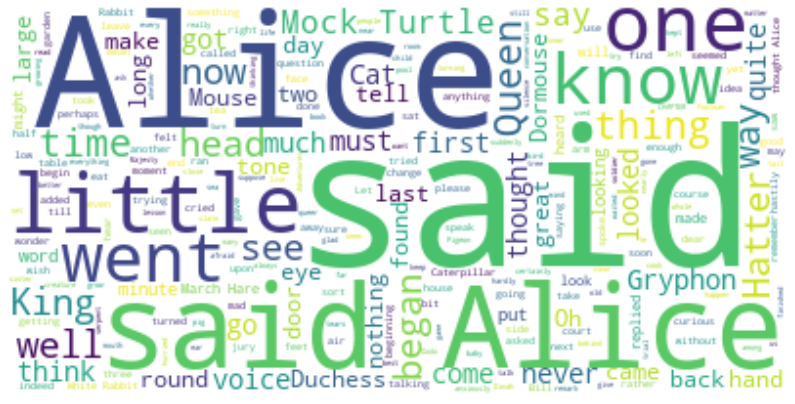

In [42]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Namun, said bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang cloud.

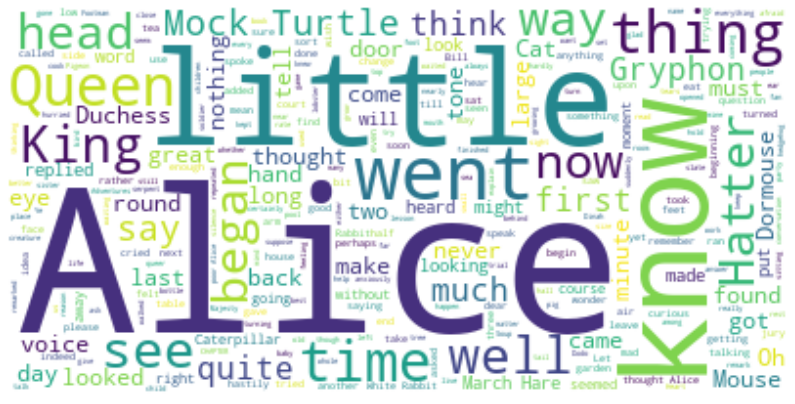

In [43]:
#stopwords.add('said') 

# add the words said to stopwords
stopwords.update(["said", "one", "go"])

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Hal keren lainnya yang dapat kalian terapkan dengan package word_cloud adalah melapiskan kata-kata ke mask dalam bentuk apa pun. Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask untuk kalian, jadi mari lanjutkan dan unduh dan beri nama alice_mask.png

In [44]:
from PIL import Image # converting images into arrays

# download image
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


Mari kita lihat bagaimana maskingnya terlihat.

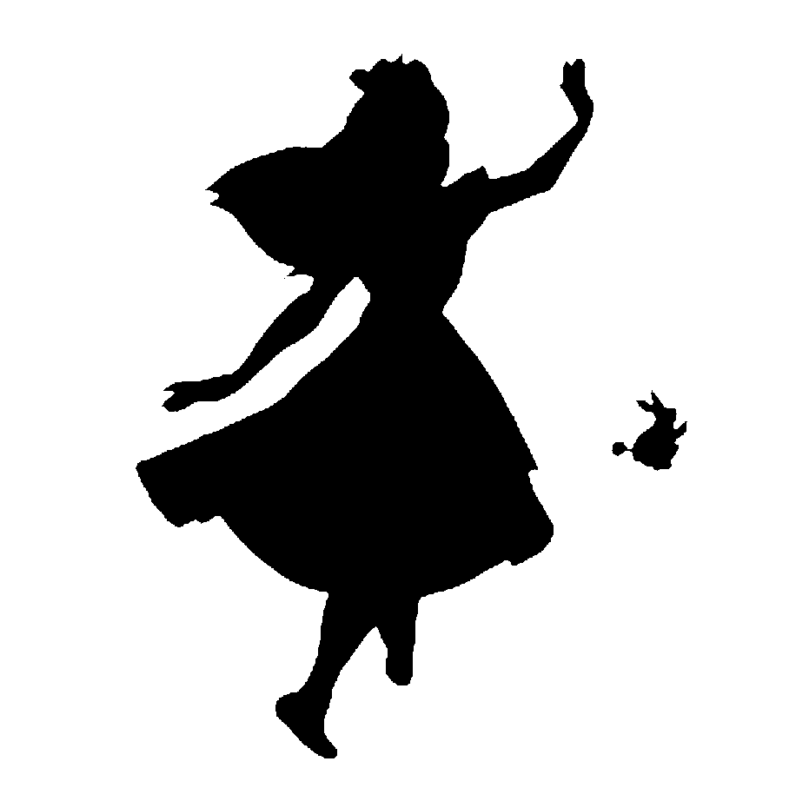

In [45]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai dengan masking sangat mudah menggunakan word_cloud. Agar simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

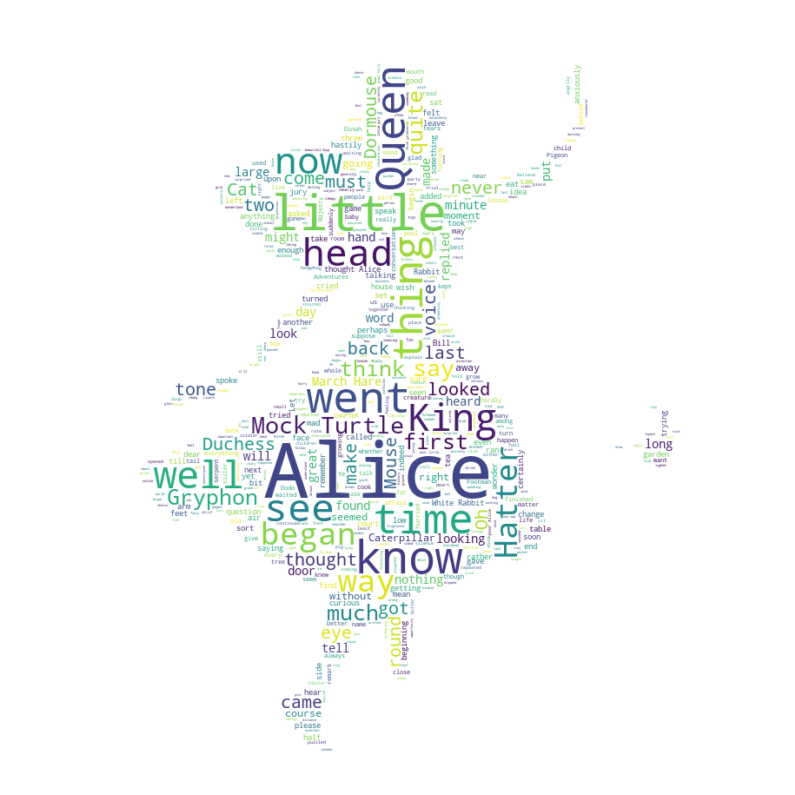

In [46]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Mari kita buat contoh data teks dari dataset imigrasi sebelumnya, katakanlah data teks 90 kata.

In [47]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,561,539,620,603,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4752,4325,3774,4331,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,15.0


berapa total imigrasi dari 1980 hingga 2013?

In [48]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [49]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.

In [50]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Kita tidak berurusan dengan stopwords apa pun di sini, jadi tidak perlu passing saat membuat kata cloud.

In [51]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


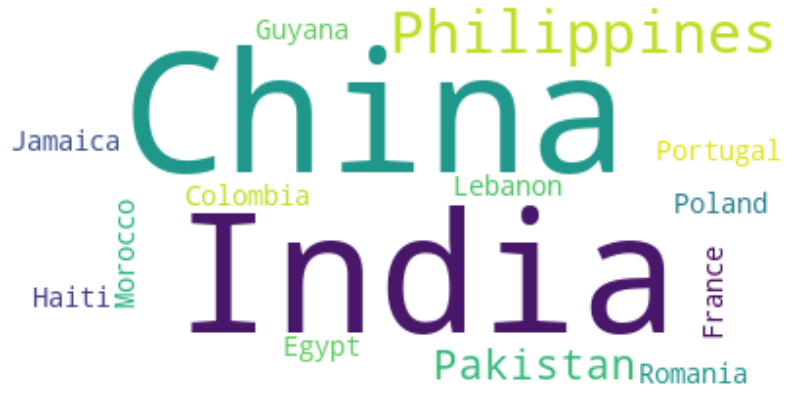

In [52]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Menurut word cloud di atas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun.

## Buat World Cloud Pilkada Jakarta 2017 

-----

## Regressions Plots

Seaborn adalah perpustakaan visualisasi Python berdasarkan matplotlib. Ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik.

Info lanjut tentang seaborn : http://seaborn.pydata.org/generated/seaborn.regplot.html

In [53]:
# install seaborn
!pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013.

In [54]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [55]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [56]:
# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)
df_tot.index

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0],
             dtype='float64')

In [57]:
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)
df_tot.index

RangeIndex(start=0, stop=34, step=1)

In [58]:
# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Dengan seaborn, membuat plot regresi semudah memanggil fungsi regplot

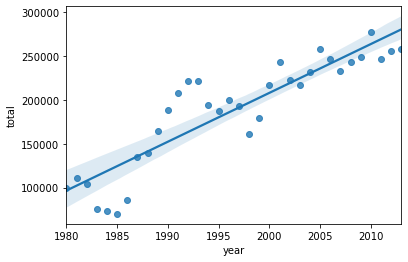

In [59]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Kita juga dapat menyesuaikan warna scatter plot dan garis regresi. Mari kita ubah warnanya menjadi hijau.

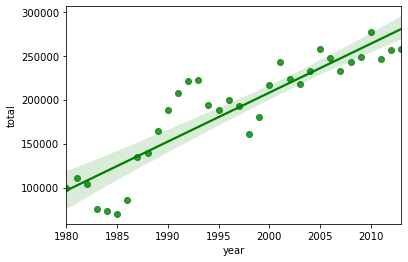

In [60]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markers, mari gunakan '+'.

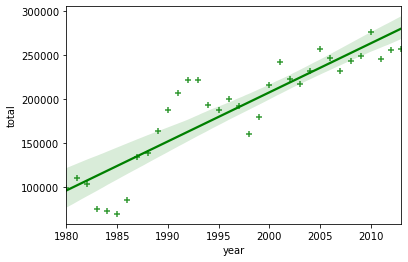

In [61]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Mari kita perbesar plotnya sedikit agar lebih menarik untuk dilihat.

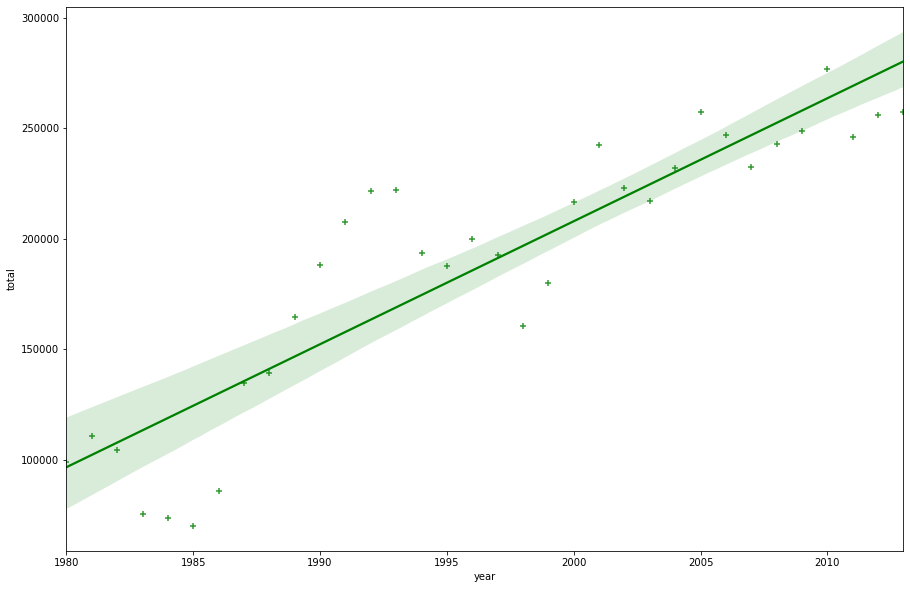

In [62]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Dan mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, dan tambahkan judul serta label x dan y.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

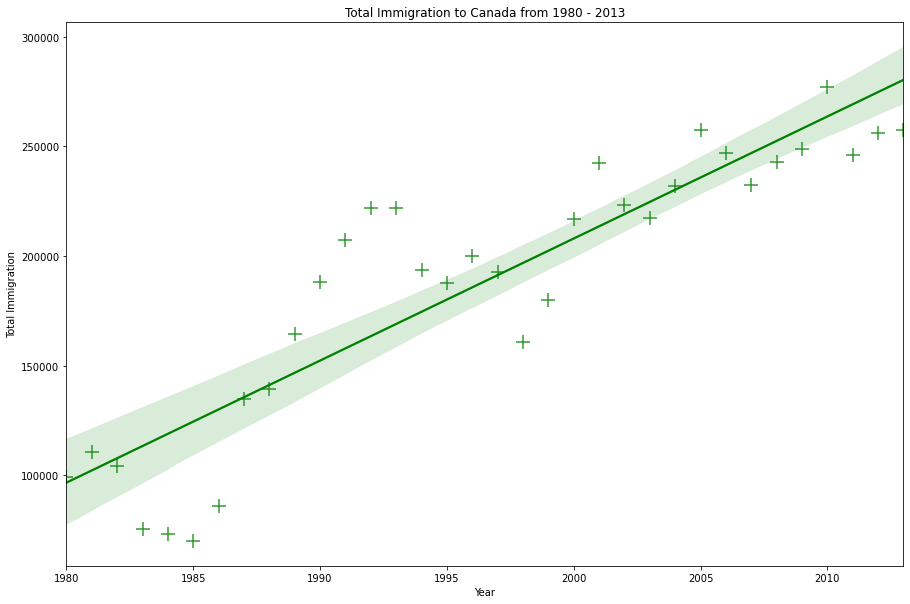

In [63]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

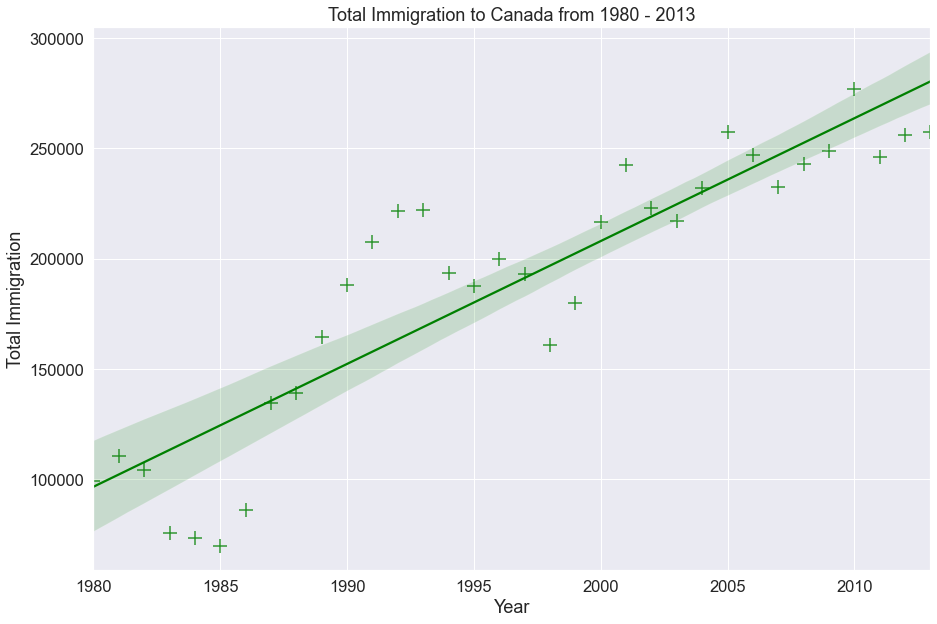

In [64]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Selain itu, kalian dapat dengan mudah mengubah gaya ke latar belakang polos putih.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

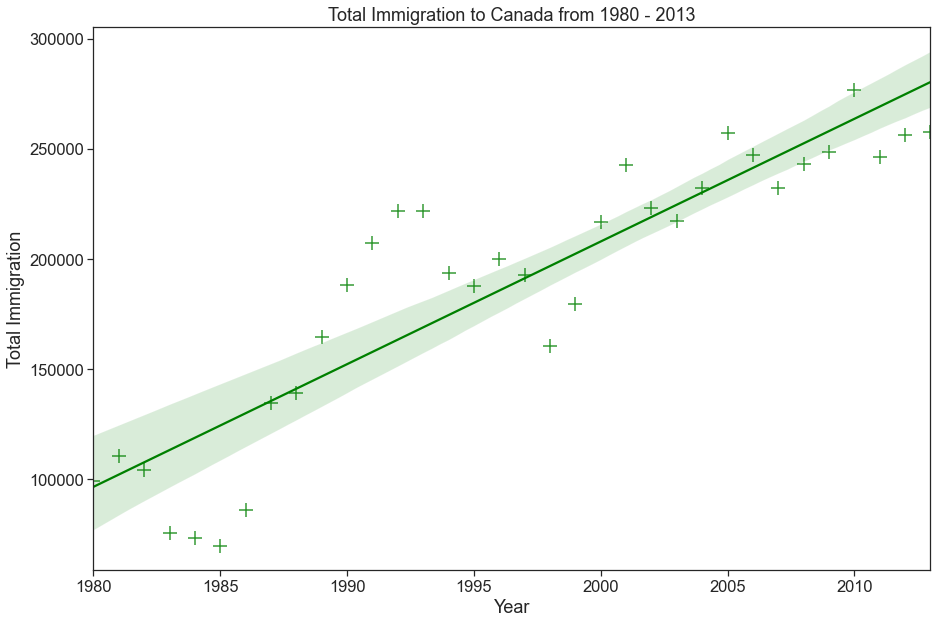

In [65]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Atau ke latar belakang putih dengan garis kisi/grid lines.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

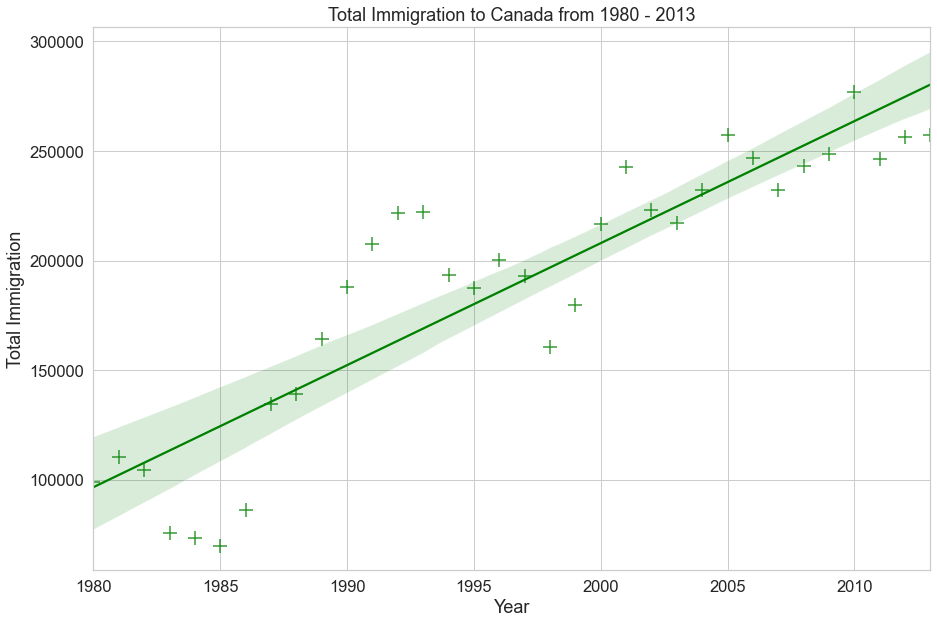

In [66]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [67]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [68]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


In [69]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total

,0
1980,669
1981,678
1982,627
1983,333
1984,252
1985,285
1986,336
1987,387
1988,373
1989,387


In [70]:
# reset index in place
df_total.reset_index(inplace=True)
df_total.index

RangeIndex(start=0, stop=34, step=1)

In [71]:
# rename columns
df_total.columns = ['year', 'total']
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


In [72]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

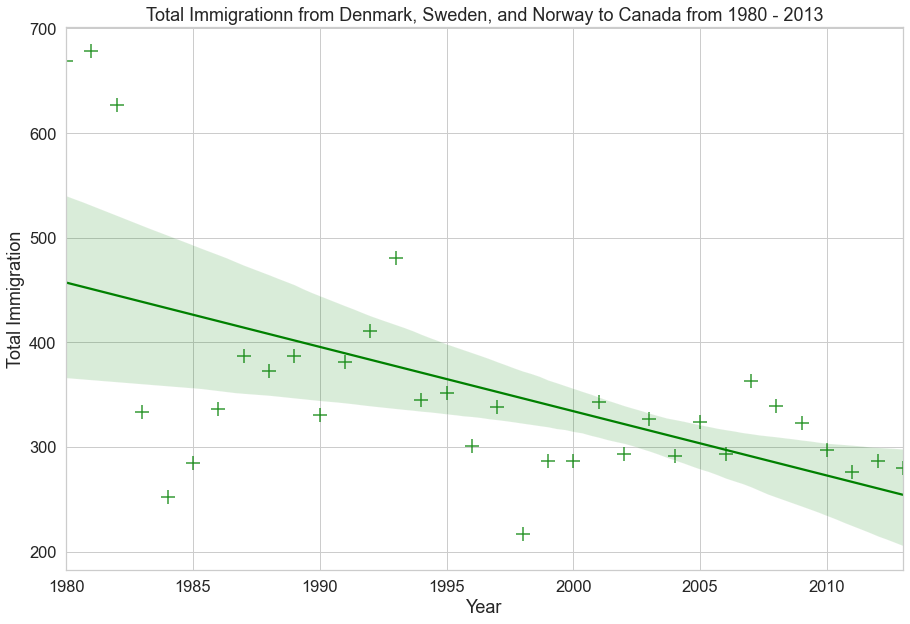

In [73]:
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

----

# Advanced Visualization 2

Pada section ini kita bekerja dengan pustaka visualisasi Python lain, yaitu `Folium`. 

Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium, di sisi lain, sepenuhnya gratis.

## Exploring Datasets with Pandas and Matplotlib

Datasets:

1. Insiden Departemen Kepolisian San Francisco untuk tahun 2016 - Insiden Departemen Kepolisian dari portal data publik San Francisco. Insiden berasal dari sistem Pelaporan Insiden Kejahatan Departemen Kepolisian San Francisco (SFPD). Diperbarui setiap hari, menampilkan data sepanjang tahun 2016. Alamat dan lokasi telah dianonimkan dengan pindah ke blok tengah atau ke persimpangan.

2. Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada.

In [74]:
import numpy as np
import pandas as pd

## Folium
----

Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat perpustakaan ini sangat berguna untuk pembuatan dasbor.

Folium dibangun di atas kekuatan perselisihan data ekosistem Python dan kekuatan pemetaan pustaka Leaflet.js. Manipulasi data Anda dengan Python, lalu visualisasikan di peta Leaflet melalui Folium.

Folium memudahkan untuk memvisualisasikan data yang telah dimanipulasi dengan Python pada peta Leaflet interaktif. Ini memungkinkan pengikatan data ke peta untuk visualisasi choropleth serta melewatkan visualisasi Vincent/Vega sebagai penanda di peta.

Pustaka memiliki sejumlah ubin bawaan dari OpenStreetMap, Mapbox, dan Stamen, dan mendukung ubin khusus dengan kunci API Mapbox atau Cloudmade. Folium mendukung overlay GeoJSON dan TopoJSON, serta pengikatan data ke overlay tersebut untuk membuat peta choropleth dengan skema warna color-brewer.

In [75]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


Membuat peta dunia sangat mudah di Folium. Kalian cukup membuat objek Map Folium dan kemudian menampilkannya. Hal yang menarik dari peta Folium adalah peta tersebut interaktif, sehingga kalian dapat memperbesar setiap wilayah yang diinginkan meskipun pada tingkat zoom awal.

In [76]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Mari buat peta yang berpusat di sekitar Semarang dan mainkan dengan tingkat zoom untuk melihat bagaimana pengaruhnya terhadap peta yang dibuat.

In [77]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

Seperti yang kalian lihat, semakin tinggi tingkat zoom peta semakin diperbesar ke pusat yang diberikan.

Question: Create a map of Hacktiv8 with a zoom level of 15.

In [78]:
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
# display world map
world_map

Fitur keren lainnya dari Folium adalah kalian dapat menghasilkan gaya peta yang berbeda.

### A. Stamen Toner Maps

Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

Mari buat peta Stamen Toner Semarang dengan tingkat zoom 13.

In [79]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

# display map
world_map

### B. Stamen Terrain Maps

Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

Mari buat peta Stamen Terrain Semarang dengan tingkat zoom 13.

In [80]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

# display map
world_map

## Maps with Markers

unduh dan impor data police department incidents menggunakan method pandas read_csv().

In [81]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [82]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Jadi setiap baris terdiri dari 13 fitur:

* IncidentNum: Nomor Insiden
* Kategori: Kategori kejahatan atau insiden
* Deskripsi: Deskripsi kejahatan atau insiden
* DayOfWeek: Hari di mana insiden itu terjadi
* Tanggal: Tanggal terjadinya insiden
* Waktu: Waktu hari di mana insiden itu terjadi
* PdDistrict: Distrik departemen kepolisian
* Resolusi: Penyelesaian kejahatan dalam hal apakah pelaku ditangkap atau tidak
* Alamat: Alamat terdekat dengan tempat kejadian
* X: Nilai bujur dari lokasi kejahatan
* Y: Nilai garis lintang lokasi kejahatan
* Lokasi: Tuple nilai lintang dan bujur
* PdId: ID departemen kepolisian
* Mari kita cari tahu berapa banyak entri di kumpulan data kita.

In [83]:
df_incidents.shape

(150500, 13)

Jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi pada tahun 2016. Untuk mengurangi computational cost, mari kita bekerja dengan hanya 100 insiden pertama dalam kumpulan data ini.

In [84]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [85]:
df_incidents.shape

(100, 13)

Sekarang setelah kita sedikit mengurangi datanya, mari kita visualisasikan dimana kejahatan terjadi di kota San Francisco. Kita akan menggunakan gaya default dan kita akan menginisialisasi tingkat zoom ke 12.

In [86]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [87]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dengan fitur dan gayanya sendiri, lalu menambahkannya ke sanfran_map.

In [88]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group 
# y latitude , x long 
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Kalian juga dapat menambahkan beberapa teks pop-up yang akan ditampilkan saat kalian mengarahkan kursor ke atas marker. Mari buat setiap penanda menampilkan kategori kejahatan saat diarahkan ke atas marker.

In [89]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

Sekarang kita dapat mengetahui kategori kejahatan apa yang terjadi di setiap marker.
Jika kalian menyadari peta menjadi sangat padat akan semua marker ini, ada dua solusi untuk masalah ini. Solusi yang lebih sederhana adalah dengan menghapus marker lokasi ini dan menambahkan teks ke marker lingkaran itu sendiri sebagai berikut:

In [90]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

Solusi lain yang tepat adalah dengan mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster kemudian diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat kalian analisis secara terpisah.

Untuk mengimplementasikannya, kita mulai dengan membuat instance objek MarkerCluster dan menambahkan semua titik data di dataframe ke objek ini.

In [91]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Perhatikan bagaimana saat kalian memperkecil sepenuhnya, semua marker dikelompokkan ke dalam satu cluster, cluster global, dari 100 marker atau kejahatan, yang merupakan jumlah total kejahatan dalam dataframe kita. Setelah kalian mulai memperbesar, cluster global akan mulai dibagi menjadi beberapa cluster yang lebih kecil. Memperbesar sepenuhnya akan menghasilkan marker individual.

## Choropleth Maps
---

Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah. Di bawah ini adalah peta Choropleth AS yang menggambarkan populasi dengan mil persegi per negara bagian.

Sekarang, mari buat peta Choropleth dunia kita sendiri yang menggambarkan imigrasi dari berbagai negara ke Canada.

In [92]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [93]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print(df_can.shape)

(195, 51)


In [95]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type',
             'Coverage','Unnamed: 43','Unnamed: 44',
             'Unnamed: 45','Unnamed: 46','Unnamed: 47',
             'Unnamed: 48','Unnamed: 49','Unnamed: 50'], 
            axis=1, inplace=True)

# rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


In [96]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Untuk membuat peta Choropleth, kita membutuhkan file GeoJSON yang mendefinisikan area / batas negara bagian, kabupaten, atau negara yang kita minati. Dalam kasus kita, karena kita berusaha untuk membuat peta dunia, kita menginginkan sebuah GeoJSON yang mendefinisikan batas-batas semua negara dunia. Unduh file GeoJSON terlebih dahulu.

In [97]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Sekarang setelah kita memiliki file GeoJSON, mari buat peta dunia, berpusat di sekitar [0, 0] nilai lintang dan bujur, dengan tingkat zoom awal 2, dan menggunakan gaya Mapbox Bright.

In [98]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

ValueError: Built-in templates for Mapbox and Cloudmade have been removed. You can still use these providers by passing a URL to the `tiles` argument. See the documentation of the `TileLayer` class.

# Latihan ke-1 Visualisasi Dataset Titanic

### Langkah 1. Impor perpustakaan yang diperlukan 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Langkah 2. Impor dataset dari alamat ini 

In [100]:
url = 'https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/titanic.csv'

### Langkah 3. buat varibael  df_titanic 

In [101]:
df_titanic = pd.read_csv(url)

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Langkah 4. Tetapkan PassengerId sebagai indeks

In [102]:
df_titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Langkah 5. Buat diagram lingkaran yang menyajikan proporsi pria/wanita

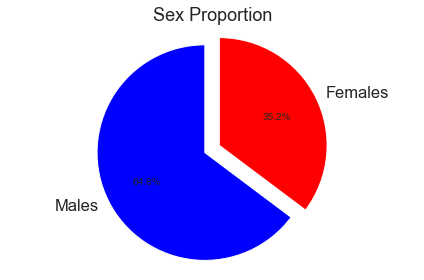

In [103]:
# sum the instances of males and females
males = (df_titanic['Sex'] == 'male').sum()
females = (df_titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

(-5.0, 85.0)

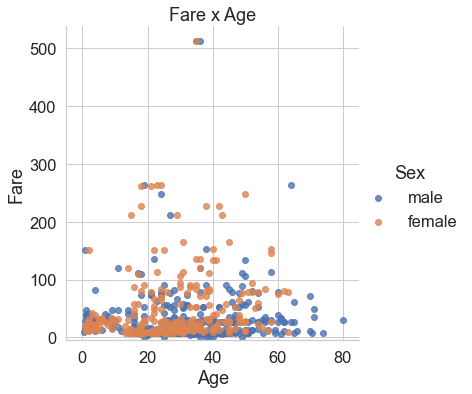

In [104]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = df_titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [105]:
df_titanic.Survived.sum()

342

### Langkah 7. Berapa banyak orang yang selamat?

In [106]:
df_titanic.Survived.sum()

342

### Langkah 8. Buat histogram dengan Tarif yang dibayarkan

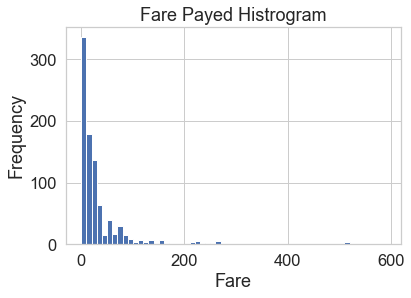

In [107]:
# sort the values from the top to the least value and slice the first 5 items
df = df_titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()